# Import Libraries

In [1]:
import pandas
import numpy
import matplotlib
import os
import operator
import tensorflow
import sklearn
import sklearn.model_selection
import seaborn

# Load Dataset

In [2]:
# Kaggle data paths
os.listdir('../input/digit-recognizer/')

['sample_submission.csv', 'train.csv', 'test.csv']

In [3]:
# Read kaggle data sets
train_kaggle = pandas.read_csv('../input/digit-recognizer/train.csv').values
test_kaggle = pandas.read_csv('../input/digit-recognizer/test.csv').values

X_train_kaggle = train_kaggle[:,1:].reshape(-1,28,28)
y_train_kaggle = train_kaggle[:,:1].flatten()

In [4]:
# Loading external data from tensorflow datasets
(X_train_tensorflow, y_train_tensorflow), (X_test_tensorflow, y_test_tensorflow) = tensorflow.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# Merge kaagle and tensorflow data
train_X = numpy.vstack((X_train_tensorflow, X_test_tensorflow,X_train_kaggle))
train_y = numpy.concatenate([y_train_tensorflow, y_test_tensorflow,y_train_kaggle])

# Data Preprocessing

In [6]:
# Data Normalization
train_X  = train_X.astype('float32') / 255
test_kaggle = test_kaggle.astype('float32') / 255

 # Create a Validation Dataset

In [7]:
X_train, X_val , y_train, y_val = sklearn.model_selection.train_test_split(train_X,train_y,train_size=0.8,shuffle=False)

In [8]:
#Change data shape for model
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)

# Make labels categorical for model
y_val = tensorflow.keras.utils.to_categorical(y_val, 10)
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)

# Build Model

In [9]:
# Define the model
model = tensorflow.keras.models.Sequential()

model.add(tensorflow.keras.layers.Conv2D(filters=32, kernel_size=5, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=2))

model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=5, padding='valid', activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=2))

model.add(tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=2))

model.add(tensorflow.keras.layers.Flatten())

model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.4))

model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.4))

model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.4))

model.add(tensorflow.keras.layers.Dense(10, activation='softmax'))

In [10]:
# Summarize the model
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          7

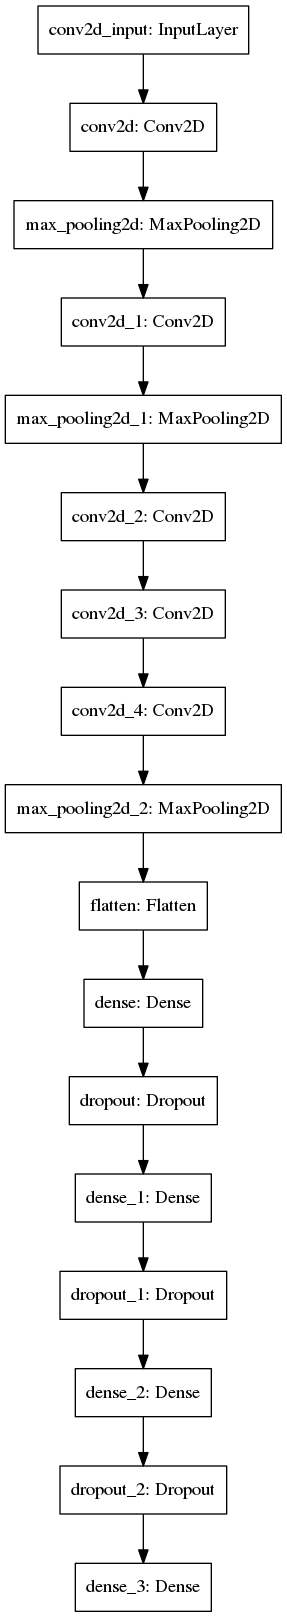

In [11]:
# Plot the model
tensorflow.keras.utils.plot_model(model)

In [12]:
#complie model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# train the model
reduce_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,patience=2, min_lr=0.00000001)
best_model = tensorflow.keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.4f}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

hist = model.fit(X_train, y_train, batch_size=64, epochs=30,
          validation_data=(X_val, y_val), callbacks=[reduce_lr,best_model],
          verbose=1, shuffle=True)

Train on 89600 samples, validate on 22400 samples
Epoch 1/30
89408/89600 [============================>.] - ETA: 0s - loss: 0.2188 - acc: 0.9317
Epoch 00001: val_acc improved from -inf to 0.98750, saving model to weights.01-0.0533-0.9875.hdf5
89600/89600 [==============================] - 12s 129us/sample - loss: 0.2184 - acc: 0.9318 - val_loss: 0.0533 - val_acc: 0.9875
Epoch 2/30
89344/89600 [============================>.] - ETA: 0s - loss: 0.0546 - acc: 0.9868
Epoch 00002: val_acc did not improve from 0.98750
89600/89600 [==============================] - 8s 94us/sample - loss: 0.0545 - acc: 0.9868 - val_loss: 0.0669 - val_acc: 0.9851
Epoch 3/30
88960/89600 [============================>.] - ETA: 0s - loss: 0.0415 - acc: 0.9902
Epoch 00003: val_acc improved from 0.98750 to 0.98817, saving model to weights.03-0.0574-0.9882.hdf5
89600/89600 [==============================] - 8s 89us/sample - loss: 0.0414 - acc: 0.9902 - val_loss: 0.0574 - val_acc: 0.9882
Epoch 4/30
89088/89600 [======

Epoch 27/30
89344/89600 [============================>.] - ETA: 0s - loss: 8.2128e-06 - acc: 1.0000
Epoch 00027: val_acc did not improve from 1.00000
89600/89600 [==============================] - 8s 88us/sample - loss: 8.1893e-06 - acc: 1.0000 - val_loss: 6.9924e-06 - val_acc: 1.0000
Epoch 28/30
89472/89600 [============================>.] - ETA: 0s - loss: 6.4395e-06 - acc: 1.0000
Epoch 00028: ReduceLROnPlateau reducing learning rate to 7.289999985005124e-07.

Epoch 00028: val_acc did not improve from 1.00000
89600/89600 [==============================] - 8s 88us/sample - loss: 6.4607e-06 - acc: 1.0000 - val_loss: 6.4345e-06 - val_acc: 1.0000
Epoch 29/30
89280/89600 [============================>.] - ETA: 0s - loss: 1.8995e-05 - acc: 1.0000
Epoch 00029: val_acc did not improve from 1.00000
89600/89600 [==============================] - 8s 88us/sample - loss: 1.8928e-05 - acc: 1.0000 - val_loss: 6.2875e-06 - val_acc: 1.0000
Epoch 30/30
89408/89600 [============================>.] - ET

In [14]:
# list all data in history
print(hist.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


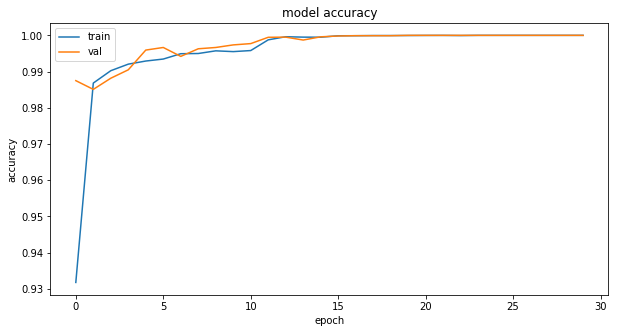

In [15]:
# summarize history for accuracy
matplotlib.pyplot.figure(figsize=(10,5))
matplotlib.pyplot.plot(hist.history['acc'])
matplotlib.pyplot.plot(hist.history['val_acc'])
matplotlib.pyplot.title('model accuracy')
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'val'], loc='upper left')
matplotlib.pyplot.show()

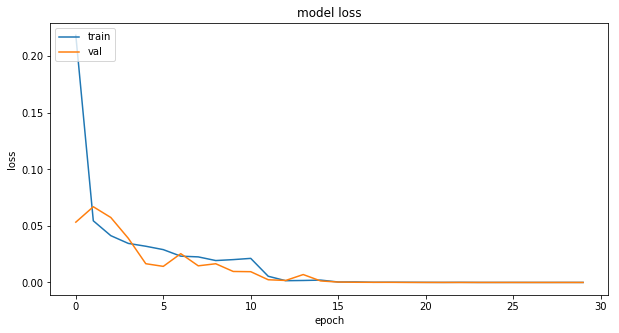

In [16]:
# summarize history for loss
matplotlib.pyplot.figure(figsize=(10,5))
matplotlib.pyplot.plot(hist.history['loss'])
matplotlib.pyplot.plot(hist.history['val_loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'val'], loc='upper left')
matplotlib.pyplot.show()